#### 공부시간과 과외횟수에 따른 점수 예측하기
- 목표 : 공부시간과 과외횟수가 가지는 패턴/규칙을 찾아서 점수예측
- 데이터셋 : 임의의 생성
- 피쳐/속성 : 공부시간,과외횟수
- 타겟/라벨 : 점수
- 학습방법 : 지도학습 > 회귀
- 알고리즘 : 선형회귀 <== [조건] 데이터분포가 선형 분포여야함!

[1] 데이터 준비

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

hour=[1,3,4,5,7,9,10]
grade=[32,55,83,70,99,92,100]
lesson=[0,0,2,1,2,0,1]

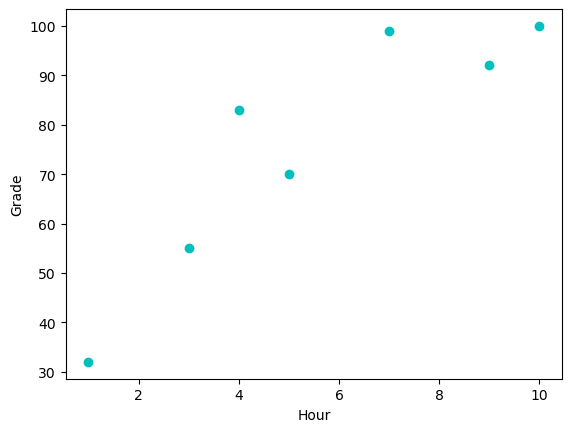

In [3]:
### 현제 데이터의 분포 확인
plt.plot(hour,grade,'co')
plt.xlabel('Hour')
plt.ylabel('Grade')
plt.show()

In [4]:
### 학습용 데이터셋 구성 =>피쳐와 타겟
dataDF=pd.DataFrame({'Hour':hour,'Lesson':lesson})
gradeSR=pd.Series(grade)

[2] 학습 진행 - 다중 선형 회귀

In [5]:
# 모듈로딩 
from sklearn.linear_model import LinearRegression

In [7]:
# 인스턴스생성
model=LinearRegression()
# 학습진행 => coef_, intercept_
model.fit(dataDF,gradeSR)

LinearRegression()

In [9]:
# 학습후 모델 파라미터 => 피쳐가 2개 ==> coef_2개
print(f'model.coef_ : {len(model.coef_)}개, {model.coef_}  \nmodel.intercept_ : {model.intercept_}')

model.coef_ : 2개, [ 6.27924892 11.61819933]  
model.intercept_ : 30.914299470390006


[3] 모델 성능 평가

In [11]:
### 오차계산 즉, 손실/비용함수 확인
### - root_mean_squared_error upto v1.4
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [12]:
score=model.score(dataDF,gradeSR)
print(f'score : {score}')

score : 0.9649627963178466


In [14]:
# 성능지표 =>  오차계산과 결정계수 계산
pre_grade=model.predict(dataDF)

# 손실/비용 계산 함수 ==> 정답과 예측값 : 0에 가까울수록 좋음
mse=mean_squared_error(gradeSR,pre_grade)
rmse=mse=mean_squared_error(gradeSR,pre_grade,squared=False)
mae=mean_absolute_error(gradeSR,pre_grade)

# 얼마나 정답에 가깝게 값을 예측 했느냐를 나타네는 지표 ==> 정답과 예측값 제공 : 1에 가까울수록 좋음
r2=r2_score(gradeSR,pre_grade)

## 손실/비용함수 값은 0에 가까울 수록
## 결정계수 값은 1에 가까울수록 성능 GOOD
print(f'mse : {mse}')
print(f'rmse : {rmse}')
print(f'mae : {mae}')
print(f'r2 : {r2}')

mse : 4.374311772187069
rmse : 4.374311772187069
mae : 4.127794208680101
r2 : 0.9649627963178466
